In [10]:
import tarfile
from astropy.io import fits
import os
import numpy as np

# Specify the path to your tarball file
tarball_path = 'erass1cl_primary_v3.2.fits (1).tgz'

# Extract the tarball
with tarfile.open(tarball_path, 'r:gz') as tar:
    # Extract all files to a temporary directory
    temp_dir = 'path/to/your/temporary/directory'
    tar.extractall(temp_dir)

# List the files in the temporary directory
files_in_temp_dir = os.listdir(temp_dir)

# Find the FITS file in the temporary directory
fits_file_name = [file for file in files_in_temp_dir if file.endswith('.fits')][0]
fits_file_path = os.path.join(temp_dir, fits_file_name)

# Open the FITS file
fits_file = fits.open(fits_file_path)

# Continue with the rest of the code as before...

# Close the FITS file
#fits_file.close()

In [3]:
from astropy.io import fits

# Open the FITS file
fits_file = fits.open('erass1cl_primary_v3.2.fits')

# Check the number of HDUs in the file
num_hdus = len(fits_file)
print(f'Number of HDUs: {num_hdus}')

# Print information about each HDU
for i in range(num_hdus):
    hdu_info = fits_file[i].header
    print(f'\nHDU {i} Info:')
    print(hdu_info)

# Access HDU0 (Primary)
hdu0 = fits_file[0]
# Access HDU1 (Joined)
hdu1 = fits_file[1]



Number of HDUs: 2

HDU 0 Info:
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                17368 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                                            COMMENT The VOTable describes the metadata of the table contained               COMMENT in the following BINTABLE extension.                                    COMMENT Such a BINTABLE extension can be used on its own as a perfectly         COMMENT g

In [4]:
data_table = fits_file[1].data

# Example: Print the values in the 'NAME' column
names = data_table['EXT_LIKE']
print(names)

[ 9.634506  14.928127   6.9752207 ...  9.668452   4.6105614 20.523039 ]


In [34]:
data_table = fits_file[1].data

# Example: Print all values in the 'MATCH_NAME' column
names = data_table['NAME']
for name in names:
    print(name)

1eRASS J000005.2-383729
1eRASS J000021.4-824954
1eRASS J000031.0-500903
1eRASS J000031.8-630131
1eRASS J000045.3-462341
1eRASS J000056.7-682010
1eRASS J000104.0-464435
1eRASS J000104.1-431959
1eRASS J000105.4-380934
1eRASS J000107.3-804612
1eRASS J000107.5-484301
1eRASS J000109.0-332939
1eRASS J000130.9-455732
1eRASS J000137.0-625826
1eRASS J000154.0-365735
1eRASS J000155.3-561443
1eRASS J000155.6-560812
1eRASS J000203.6-481447
1eRASS J000205.7-713020
1eRASS J000220.3-435849
1eRASS J000223.3-820818
1eRASS J000236.8-471113
1eRASS J000240.5-344030
1eRASS J000252.6-680407
1eRASS J000313.1-355607
1eRASS J000329.4-525445
1eRASS J000350.1-695852
1eRASS J000354.1-680504
1eRASS J000413.3-344222
1eRASS J000414.3-752630
1eRASS J000416.3-642519
1eRASS J000425.0-601518
1eRASS J000425.6-561726
1eRASS J000439.7-770812
1eRASS J000446.1-345854
1eRASS J000450.0-691149
1eRASS J000454.3-680204
1eRASS J000508.7-614657
1eRASS J000517.0-374903
1eRASS J000540.6-534850
1eRASS J000546.1-375131
1eRASS J000557.9

In [14]:
# List of cluster names to search
cluster_names_to_search = ['COSMOS-125', 'COSMOS-221', 'COSMOS-28', 'COSMOS-63', 'SPT0205', 'SPT0546', 'SPT2106',
                            'SpARCS0035', 'SpARCS0335', 'SpARCS0034', 'SpARCS0036']

# Get the 'MATCH_NAME' values from the data table
names = data_table['MATCH_NAME']

# Search for the specified cluster names using boolean indexing
found_clusters_mask = np.isin(names, cluster_names_to_search)

# Filter the data based on the boolean mask
found_clusters = names[found_clusters_mask]

# Print the found clusters
print(found_clusters)

[]


In [87]:

# Assuming you have a column named "ClusterName" in your data_table
cluster_names = data_table['NAME']

# Calculate the total number of clusters
total_clusters = len(cluster_names)

print(f'Total Number of Clusters: {total_clusters}')

Total Number of Clusters: 12247


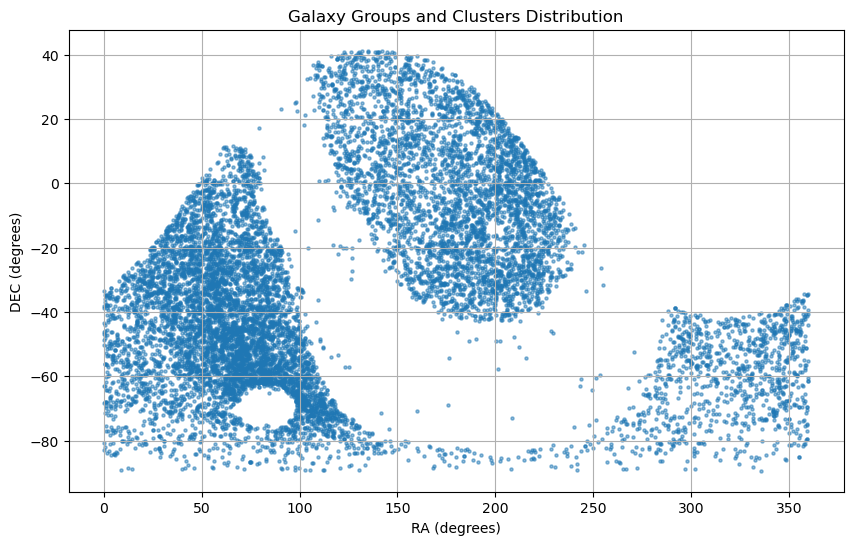

In [21]:
import matplotlib.pyplot as plt

# Access the data in the BINTABLE extension (HDU 1)
data_table = fits_file[1].data

# Extract RA and DEC columns
ra = data_table['RA']
dec = data_table['DEC']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ra, dec, s=5, alpha=0.5)  # Adjust 's' for point size and 'alpha' for transparency
plt.title('Galaxy Groups and Clusters Distribution')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.grid(True)
plt.show()

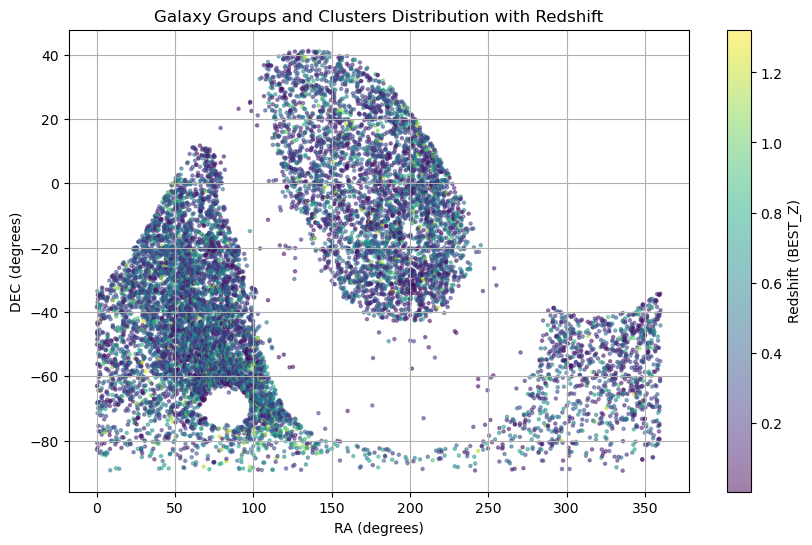

In [32]:
# Extract RA, DEC, and redshift columns
ra = data_table['RA']
dec = data_table['DEC']
redshift = data_table['BEST_Z']

# Create a scatter plot with redshift information
plt.figure(figsize=(10, 6))
scatter = plt.scatter(ra, dec, c=redshift, s=5, alpha=0.5, cmap='viridis')  # Adjust 's' for point size and 'alpha' for transparency
plt.title('Galaxy Groups and Clusters Distribution with Redshift')
plt.xlabel('RA (degrees)')
plt.ylabel('DEC (degrees)')
plt.colorbar(scatter, label='Redshift (BEST_Z)')
plt.grid(True)
plt.show()

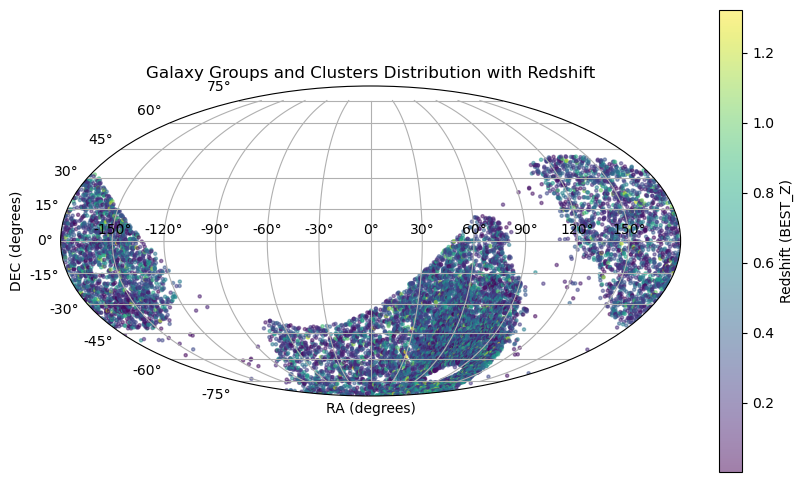

In [78]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Extract RA, DEC, and redshift columns
ra = data_table['RA']
dec = data_table['DEC']
redshift = data_table['BEST_Z']

# Create a Mollweide scatter plot with redshift information
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="mollweide")
scatter = ax.scatter(ra_mollweide, np.radians(dec), c=redshift, s=5, alpha=0.5, cmap='viridis')
ax.set_title('Galaxy Groups and Clusters Distribution with Redshift')
ax.set_xlabel('RA (degrees)')
ax.set_ylabel('DEC (degrees)')
plt.colorbar(scatter, label='Redshift (BEST_Z)')
plt.grid(True)
plt.show()

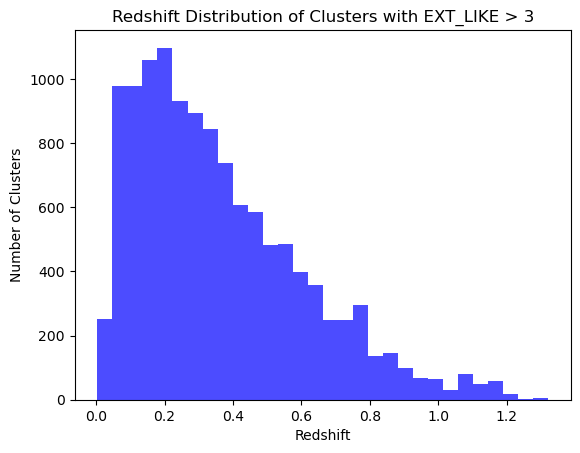

12247


In [108]:
# Assuming you have a column named "EXT_LIKE" in your data_table
ext_like_values = data_table['EXT_LIKE']

# Filter data based on EXT_LIKE > 3
filtered_data = data_table[ext_like_values > 3]

# Create a histogram
plt.hist(filtered_data['BEST_Z'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Redshift')
plt.ylabel('Number of Clusters')
plt.title('Redshift Distribution of Clusters with EXT_LIKE > 3')
plt.show()
print(len(redshift_values))